In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from torchvision import transforms
import time
from matplotlib import pyplot as plt

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [32]:
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
    transforms.ToTensor()
])

train_data = torchvision.datasets.MNIST(root = "./data", download = True, train = True, transform = transform) # torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root = "./data", download = True, train = False, transform = transform) #torchvision.transforms.ToTensor())

In [33]:
train_data_batches = DataLoader(train_data, batch_size = 8, shuffle = True)
test_data_batches = DataLoader(test_data, batch_size = 8, shuffle = True)

In [34]:
# train_data_batches = train_data.to(device)

torch.Size([16, 4, 4])
tensor([[[ 11.6771,  12.3666,  13.0562,  13.7457],
         [  8.4583,   9.1479,   9.8374,  10.5270],
         [ 13.2960,  13.9855,  14.6751,  15.3646],
         [  9.0439,   9.7335,  10.4230,  11.1126]],

        [[  7.1221,   7.1425,   7.1630,   7.1834],
         [ -4.4278,  -4.4073,  -4.3869,  -4.3665],
         [ -1.6428,  -1.6224,  -1.6019,  -1.5815],
         [  1.9124,   1.9328,   1.9532,   1.9736]],

        [[ 15.6459,  16.5970,  17.5481,  18.4992],
         [ 13.3706,  14.3217,  15.2728,  16.2239],
         [ 15.0450,  15.9961,  16.9472,  17.8983],
         [ 11.3957,  12.3468,  13.2979,  14.2490]],

        [[  5.4390,   6.0137,   6.5884,   7.1632],
         [ 11.2775,  11.8522,  12.4269,  13.0017],
         [  6.9398,   7.5146,   8.0893,   8.6640],
         [  4.8015,   5.3763,   5.9510,   6.5257]],

        [[ 11.3202,  11.8242,  12.3282,  12.8322],
         [  5.8866,   6.3906,   6.8945,   7.3985],
         [  7.0997,   7.6037,   8.1077,   8.6117],


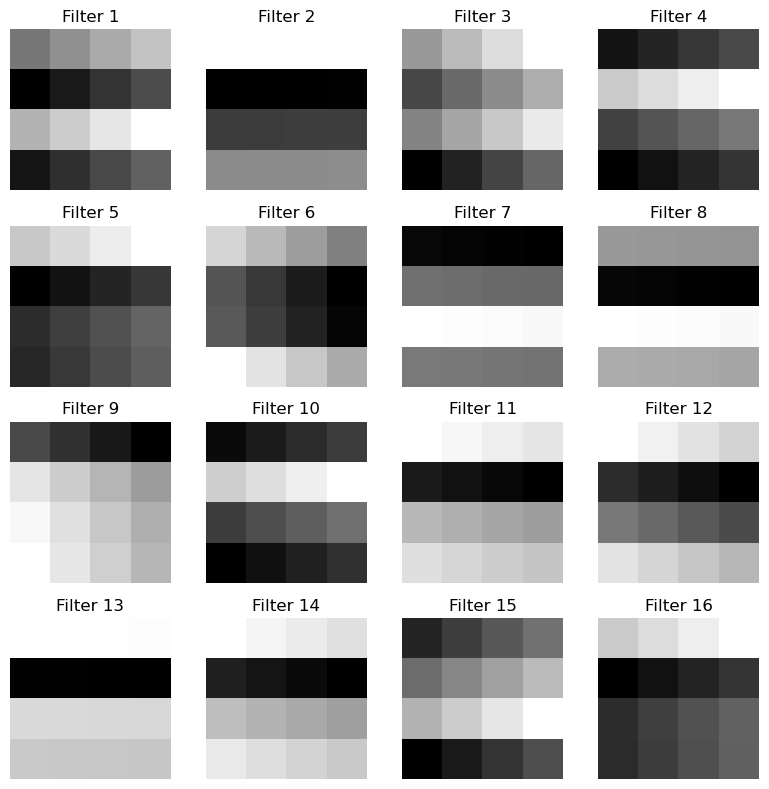

torch.Size([16, 2, 2])
tensor([[[ 12.3666,  13.7457],
         [ 13.9855,  15.3646]],

        [[  7.1425,   7.1834],
         [  1.9328,   1.9736]],

        [[ 16.5970,  18.4992],
         [ 15.9961,  17.8983]],

        [[ 11.8522,  13.0017],
         [  7.5146,   8.6640]],

        [[ 11.8242,  12.8322],
         [  7.6037,   8.6117]],

        [[-10.7862, -12.6753],
         [ -9.3766, -11.2657]],

        [[ -0.5476,  -0.6884],
         [  3.7070,   3.5662]],

        [[ -0.8588,  -1.2756],
         [  8.6094,   8.1926]],

        [[-18.7791, -21.4414],
         [-17.3478, -20.0101]],

        [[ 19.5606,  21.3593],
         [ 11.7142,  13.5129]],

        [[ -0.1949,  -0.9960],
         [ -1.7099,  -2.5109]],

        [[ -5.9731,  -7.7896],
         [ -7.6654,  -9.4818]],

        [[  3.3562,   3.2994],
         [  2.1910,   2.1342]],

        [[ -3.6370,  -4.9834],
         [ -5.1200,  -6.4664]],

        [[ 10.2128,  11.5624],
         [ 12.0107,  13.3603]],

        [[ 26.790

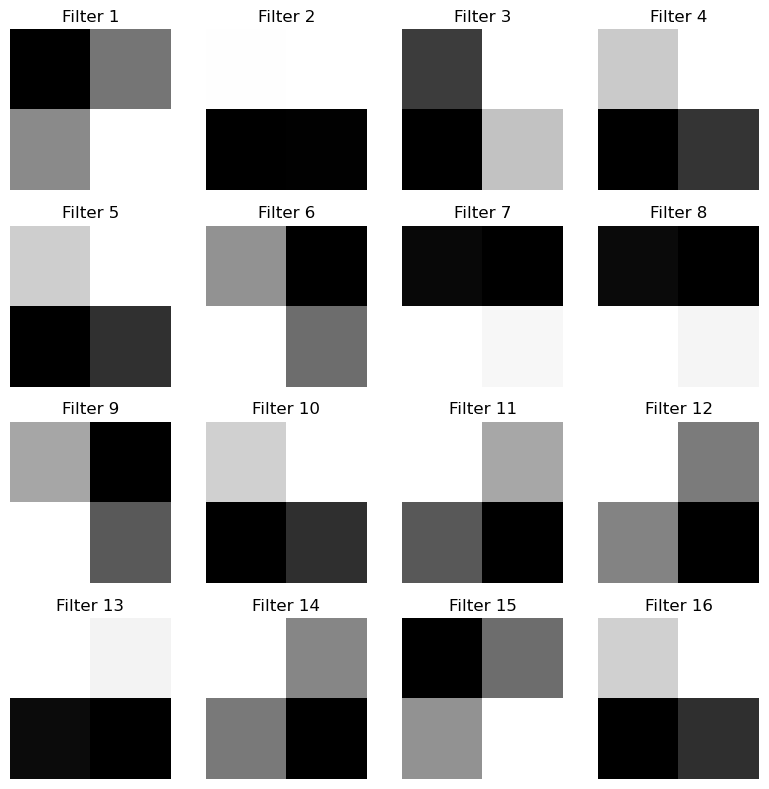

tensor([[[ 12.3666,  13.7457],
         [ 13.9855,  15.3646]],

        [[  7.1425,   7.1834],
         [  1.9328,   1.9736]],

        [[ 16.5970,  18.4992],
         [ 15.9961,  17.8983]],

        [[ 11.8522,  13.0017],
         [  7.5146,   8.6640]],

        [[ 11.8242,  12.8322],
         [  7.6037,   8.6117]],

        [[-10.7862, -12.6753],
         [ -9.3766, -11.2657]],

        [[ -0.5476,  -0.6884],
         [  3.7070,   3.5662]],

        [[ -0.8588,  -1.2756],
         [  8.6094,   8.1926]],

        [[-18.7791, -21.4414],
         [-17.3478, -20.0101]],

        [[ 19.5606,  21.3593],
         [ 11.7142,  13.5129]],

        [[ -0.1949,  -0.9960],
         [ -1.7099,  -2.5109]],

        [[ -5.9731,  -7.7896],
         [ -7.6654,  -9.4818]],

        [[  3.3562,   3.2994],
         [  2.1910,   2.1342]],

        [[ -3.6370,  -4.9834],
         [ -5.1200,  -6.4664]],

        [[ 10.2128,  11.5624],
         [ 12.0107,  13.3603]],

        [[ 26.7904,  28.9835],
         

In [35]:
class HousePriceCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv2d = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 3)
        self.pool2d = nn.MaxPool2d(kernel_size = 2, stride = 2)
        

    def forward(self, x):
        x = self.conv2d(x)
        print(x.shape)
        print(x)

        # Plot all 16 feature maps
        fig, axes = plt.subplots(4, 4, figsize=(8, 8))
        
        for i, ax in enumerate(axes.flat):
            ax.imshow(x[i].detach().numpy(), cmap="gray")
            ax.axis("off")
            ax.set_title(f"Filter {i+1}")
        
        plt.tight_layout()
        plt.show()


        x = self.pool2d(x)
        print(x.shape)
        print(x)

        
        fig, axes = plt.subplots(4, 4, figsize=(8, 8))
        for i, ax in enumerate(axes.flat):
            ax.imshow(x[i].detach().numpy(), cmap="gray")
            ax.axis("off")
            ax.set_title(f"Filter {i+1}")
            
        plt.tight_layout()
        plt.show()

        return x

x = torch.Tensor([[
    [26, 27, 28, 29, 30, 31],
    [1, 2, 3, 4, 5, 6],
    [21, 22, 23, 24, 25, 26],
    [16, 17, 18, 19, 20, 21],
    [6, 7, 8, 9, 10, 11],
    [11, 12, 13, 14, 15, 16],
]])

mod = HousePriceCNN()
mod(x)

In [36]:
class MNISTCNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        
        self.conv2d_1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, padding=1)
        self.batchnorm_1 = nn.BatchNorm2d(32)
        
        self.conv2d_2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding=1)
        self.batchnorm_2 = nn.BatchNorm2d(64)
        
        self.conv2d_3 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding=1)
        self.batchnorm_3 = nn.BatchNorm2d(128)
        
        self.conv2d_4 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, padding=1)
        self.batchnorm_4 = nn.BatchNorm2d(256)

        
        self.pool2d = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.fc_input_size = 256 * 7 * 7 # Change according to maxpool used, divide by 2 on row and col size after each maxpool
        self.fc1 = nn.Linear(self.fc_input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        
        self.dropout = nn.Dropout(0.1)
        
    def forward(self, x):
        x = self.conv2d_1(x)
        x = self.batchnorm_1(x)
        x = F.relu(x)
        
        x = self.conv2d_2(x)
        x = self.batchnorm_2(x)
        x = F.relu(x)
        x = self.pool2d(x)

        
        x = self.conv2d_3(x)
        x = self.batchnorm_3(x)
        x = F.relu(x)

        
        x = self.conv2d_4(x)
        x = self.batchnorm_4(x)
        x = F.relu(x)
        x = self.pool2d(x)

        x = x.view(x.shape[0], -1)

        # x = self.dropout(x)
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)

        
        x = self.fc2(x)
        x = F.relu(x)

        
        x = self.fc3(x)
        
        return x

In [37]:
model = MNISTCNN()

model.to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

epochs = 10
for i in range(epochs):
    for image, label in train_data_batches:
        image, label = image.to(device), label.to(device)
        optimizer.zero_grad()
        y_pred = model(image)
        loss = loss_fn(y_pred, label)
        
        loss.backward()
        optimizer.step()
        scheduler.step(loss)

    print(f"epochs: {i+1}, loss: {loss}")

epochs: 1, loss: 0.042974408715963364
epochs: 2, loss: 0.03721189498901367
epochs: 3, loss: 0.08151420950889587
epochs: 4, loss: 0.002398962154984474
epochs: 5, loss: 0.015497454442083836
epochs: 6, loss: 0.002435272093862295
epochs: 7, loss: 0.006941958796232939
epochs: 8, loss: 0.03969063237309456
epochs: 9, loss: 0.006451200693845749
epochs: 10, loss: 0.0007694220403209329


In [38]:
def check_accuracy(model, batches):
    total = 0
    correct = 0
    with torch.no_grad():
        for image, label in batches:
            image, label = image.to(device), label.to(device)
            y_pred = model(image)
            _, pred_value = torch.max(y_pred, 1)
            total += label.size(0)  # Total number of labels
            correct += (pred_value == label).sum().item()
    accuracy =  100 * correct / total
    return accuracy
t1 = time.time()
print(check_accuracy(model, test_data_batches))
print(time.time() - t1)

98.41
2.7114579677581787


In [79]:
# 97.83, 97.77
# 98.39
# 16 - 98.01
# 8 - 97.86, 97.67
# 32 - 98.26

# double layer conv2d - 98.74, 98.71, 98.79

# 99.21

MNISTCNN(
  (conv2d): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (batchnorm): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=10, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

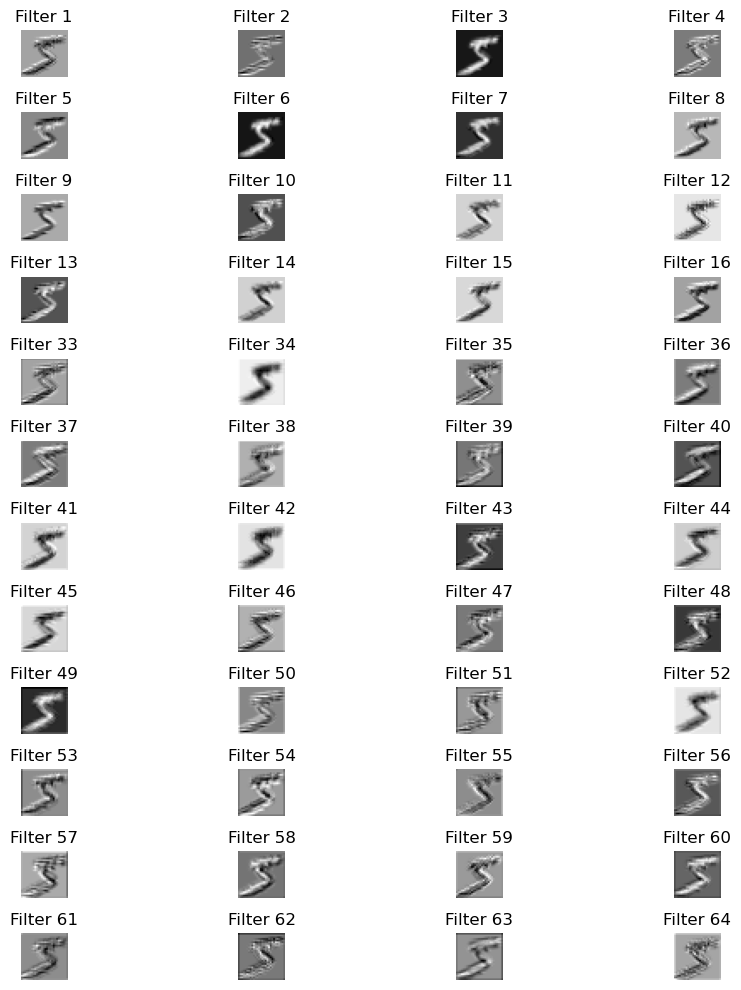

In [43]:
image, label = train_data[0]  # Taking the first image
image = image.unsqueeze(0)  # Add batch dimension (1, 1, 28, 28)

# Pass through the first convolutional layer

# Define a Conv2d layer
conv_layer = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
conv_layer2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

with torch.no_grad():
    feature_maps = conv_layer(image)  # Output shape: (1, 16, 28, 28)
    feature_maps2 = conv_layer2(feature_maps)  # Output shape: (1, 16, 28, 28)

# Convert to numpy for visualization
feature_maps = feature_maps.squeeze(0).detach().numpy()  # Shape: (16, 28, 28)
feature_maps2 = feature_maps2.squeeze(0).detach().numpy()  # Shape: (16, 28, 28)

# Plot all 16 feature maps
fig, axes = plt.subplots(12, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < 16:
        ax.imshow(feature_maps[i], cmap="gray")
        ax.axis("off")
        ax.set_title(f"Filter {i+1}")
    else:
        ax.imshow(feature_maps2[i-16], cmap="gray")
        ax.axis("off")
        ax.set_title(f"Filter {i+1+16}")

plt.tight_layout()
plt.show()

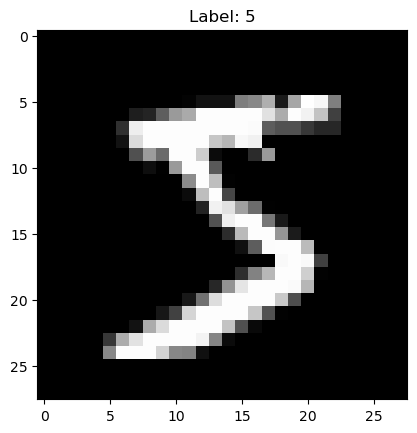

In [39]:
# Get an augmented image
img, label = train_data[0]

# Convert tensor to numpy and display
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"Label: {label}")
plt.show()